|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|gender|gender ||
|Age |Age in years| |
|sibsp |number of siblings / spouses aboard|	|
|parch |number of parents / children aboard| |
|ticket|Ticket number ||
|fare | fare| 	|
|cabin |Cabin number|	|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | Lifeboat||
|body | Body Identification Number||
|home.dest| Home/destination||

- Read data and describe it
- Find columns with missingdata
- Print shape of dataset
- drop columns with more than 25% missing data
- drop columns having independent values(which do not affect the survival rate).


- check data types of all columns
- convert price to numeric
- find columns still having missing/na values and also count of missing data
- fill na with mean for fare and age column column.
- drop na values for embarked column.
- dump the dataframe to a csv file 'titanic_filtered.csv'.


- for surviced column replace 0 with D and 1 with A
- find the frequency of different values in survived column
- group by gender and survived and see the counts in each category
- find different pclass and no of people in each class

- find top 5 people with highest values of age. Count no of male and females in the top 5
- find max age male and female who survived
- get average age by gender
- get average age by people survived vs not-survived

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\NOEL\Desktop\Data Science\weekday2019_08_06-master\weekday2019_08_06-master\titanic_dataset.csv')
print(df.describe(include = 'all'))


         Unnamed: 0       pclass     survived              name gender  \
count   1309.000000  1309.000000  1309.000000              1309   1309   
unique          NaN          NaN          NaN              1307      2   
top             NaN          NaN          NaN  Kelly, Mr. James   male   
freq            NaN          NaN          NaN                 2    843   
mean     654.000000     2.294882     0.381971               NaN    NaN   
std      378.020061     0.837836     0.486055               NaN    NaN   
min        0.000000     1.000000     0.000000               NaN    NaN   
25%      327.000000     2.000000     0.000000               NaN    NaN   
50%      654.000000     3.000000     0.000000               NaN    NaN   
75%      981.000000     3.000000     1.000000               NaN    NaN   
max     1308.000000     3.000000     1.000000               NaN    NaN   

                age        sibsp        parch    ticket    fare        cabin  \
count   1046.000000  1309.00000

In [3]:
print(df.head(n=20))

    Unnamed: 0  pclass  survived  \
0            0       1         1   
1            1       1         1   
2            2       1         0   
3            3       1         0   
4            4       1         0   
5            5       1         1   
6            6       1         1   
7            7       1         0   
8            8       1         1   
9            9       1         0   
10          10       1         0   
11          11       1         1   
12          12       1         1   
13          13       1         1   
14          14       1         1   
15          15       1         0   
16          16       1         0   
17          17       1         1   
18          18       1         1   
19          19       1         0   

                                                 name  gender      age  sibsp  \
0                       Allen, Miss. Elisabeth Walton  female  29.0000      0   
1                      Allison, Master. Hudson Trevor    male   0.9167      1   


In [4]:
print(df.shape)
print(df.dtypes)
print(df.columns)

(1309, 15)
Unnamed: 0      int64
pclass          int64
survived        int64
name           object
gender         object
age           float64
sibsp           int64
parch           int64
ticket         object
fare           object
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
dtype: object
Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')


In [5]:
print(df.isna().sum()/ df.shape[0] > 0.10) # or
print(df.shape)

Unnamed: 0    False
pclass        False
survived      False
name          False
gender        False
age            True
sibsp         False
parch         False
ticket        False
fare          False
cabin          True
embarked      False
boat           True
body           True
home.dest      True
dtype: bool
(1309, 15)


In [6]:
df.drop(columns = ['body'], inplace = True)
print(df.columns)

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')


In [7]:
df = pd.read_csv(r'C:\Users\NOEL\Desktop\Data Science\weekday2019_08_06-master\weekday2019_08_06-master\titanic_dataset.csv')


In [8]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [9]:
df.gender.value_counts()
df.dropna()

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [10]:
df.dropna(axis = 1, thresh = 1000).head()
#df.head()

,Unnamed: 0,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,$211.34,S
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,$151.55,S
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,$151.55,S
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,$151.55,S
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,$151.55,S


In [11]:
print(df.columns)
print(df.dropna(axis = 1, thresh = 330).columns)
df2 = df.dropna(axis = 1, thresh = 330)

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'],
      dtype='object')
Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked', 'boat', 'home.dest'],
      dtype='object')


In [12]:
df.head()
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,328.000000


In [13]:
df.age.fillna(df.age.mean(), inplace = True)
print(df.age.isna().any())
print(df.describe())

False
        Unnamed: 0       pclass     survived          age        sibsp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    654.000000     2.294882     0.381971    29.881135     0.498854   
std     378.020061     0.837836     0.486055    12.883199     1.041658   
min       0.000000     1.000000     0.000000     0.166700     0.000000   
25%     327.000000     2.000000     0.000000    22.000000     0.000000   
50%     654.000000     3.000000     0.000000    29.881135     0.000000   
75%     981.000000     3.000000     1.000000    35.000000     1.000000   
max    1308.000000     3.000000     1.000000    80.000000     8.000000   

             parch        body  
count  1309.000000  121.000000  
mean      0.385027  160.809917  
std       0.865560   97.696922  
min       0.000000    1.000000  
25%       0.000000   72.000000  
50%       0.000000  155.000000  
75%       0.000000  256.000000  
max       9.000000  328.000000  


In [14]:
print(dir(df.fare.str))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_freeze', '_get_series_list', '_is_categorical', '_make_accessor', '_orig', '_parent', '_validate', '_wrap_result', 'capitalize', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'ljust', 'lower', 'lstrip', 'match', 'normalize', 'pad', 'partition', 'repeat', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'slice', 'slice_replace', 'split', 'startswith', 'strip', 'swapcase',

In [15]:
col = df.fare.str.replace('$','')
print(col.head())
col = col.astype('float')
print(col.head(), col.dtype)

df.fare = col

0    211.34 
1    151.55 
2    151.55 
3    151.55 
4    151.55 
Name: fare, dtype: object
0    211.34
1    151.55
2    151.55
3    151.55
4    151.55
Name: fare, dtype: float64 float64


In [16]:
df.dtypes

Unnamed: 0      int64
pclass          int64
survived        int64
name           object
gender         object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
dtype: object

In [17]:
df.to_csv('titanic.csv')

In [18]:
import matplotlib.pyplot as plt

r = plt.hist(df.age.values, bins = 20)
print(r)
print(df.age.min(), df.age.max()) # d = (80 -0.... )/20  -> 0.166 + d, +2d

(array([ 51.,  21.,  22.,  40., 114., 160., 128., 385.,  97.,  64.,  51.,
        57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]), array([ 0.1667  ,  4.158365,  8.15003 , 12.141695, 16.13336 , 20.125025,
       24.11669 , 28.108355, 32.10002 , 36.091685, 40.08335 , 44.075015,
       48.06668 , 52.058345, 56.05001 , 60.041675, 64.03334 , 68.025005,
       72.01667 , 76.008335, 80.      ]), <a list of 20 Patch objects>)
0.1667 80.0


male      843
female    466
Name: gender, dtype: int64


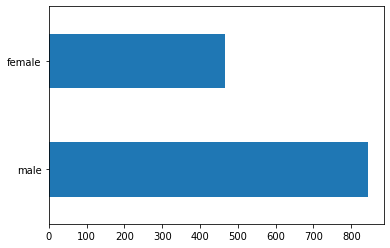

In [19]:
r = df.gender.value_counts()
print(r)
#plt.bar(r.index, r.values)
r.plot(kind = 'barh')

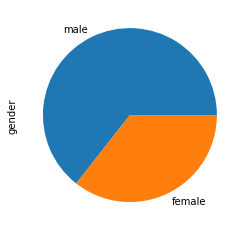

In [20]:

r.plot(kind = 'pie')

male      843
female    466
Name: gender, dtype: int64


([<matplotlib.patches.Wedge at 0x1f01b078940>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.5245491049970633, -1.0792813518479694, 'female')])

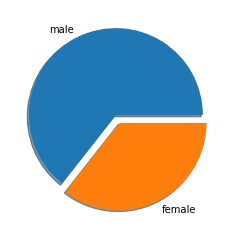

In [21]:
print(r)
plt.pie(r, labels = r.index, shadow = True, explode = [0,0.1])

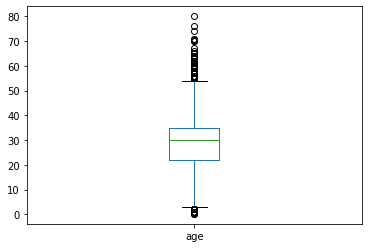

In [22]:
df.age.plot(kind = 'box')


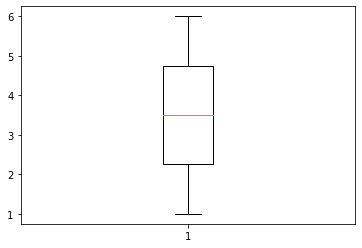

In [23]:
plt.boxplot([1,2,3,4,5,6])
plt.show()

False


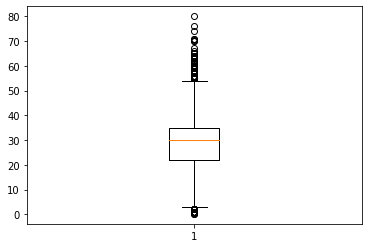

In [24]:
print(df.age.isna().any())
df.age.fillna(df.age.mean(), inplace = True)
plt.boxplot(df.age.values)
plt.show()

In [25]:
res = df.sort_values(by = ['age'], ascending = False)
print(res.head())

      Unnamed: 0  pclass  survived  \
14            14       1         1   
61            61       1         1   
1235        1235       3         0   
135          135       1         0   
9              9       1         0   

                                                   name  gender   age  sibsp  \
14                 Barkworth, Mr. Algernon Henry Wilson    male  80.0      0   
61    Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   
1235                                Svensson, Mr. Johan    male  74.0      0   
135                           Goldschmidt, Mr. George B    male  71.0      0   
9                               Artagaveytia, Mr. Ramon    male  71.0      0   

      parch    ticket   fare cabin embarked boat  body  \
14        0     27042  30.00   A23        S    B   NaN   
61        0     19877  78.85   C46        S    6   NaN   
1235      0    347060   7.78   NaN        S  NaN   NaN   
135       0  PC 17754  34.65    A5        C  NaN   NaN   


In [26]:
g = df.groupby(by = ['embarked', 'gender'])
print(g.groups)

g.age.sum()
print(dir(g))


{('S', 'female'): Int64Index([   0,    2,    4,    6,    8,   13,   21,   24,   28,   32,
            ...
            1231, 1247, 1260, 1261, 1265, 1267, 1273, 1276, 1279, 1290],
           dtype='int64', length=291), ('S', 'male'): Int64Index([   1,    3,    5,    7,   14,   15,   20,   29,   30,   34,
            ...
            1289, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1308],
           dtype='int64', length=623), ('C', 'male'): Int64Index([   9,   10,   16,   19,   22,   25,   26,   31,   39,   40,
            ...
            1253, 1255, 1256, 1277, 1299, 1301, 1302, 1303, 1306, 1307],
           dtype='int64', length=157), ('C', 'female'): Int64Index([  11,   12,   17,   18,   23,   27,   35,   41,   43,   44,
            ...
            1057, 1122, 1123, 1244, 1257, 1258, 1286, 1300, 1304, 1305],
           dtype='int64', length=113), (nan, 'female'): Int64Index([168, 284], dtype='int64'), ('Q', 'male'): Int64Index([ 206,  470,  472,  477,  487,  511,  683,  693,  694

embarked  gender
C         female    31.046168
          male      32.352264
Q         female    28.112014
          male      30.573047
S         female    28.063141
          male      29.932080
Name: age, dtype: float64
MultiIndex(levels=[['C', 'Q', 'S'], ['female', 'male']],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['embarked', 'gender'])
gender       female       male
embarked                      
C         31.046168  32.352264
Q         28.112014  30.573047
S         28.063141  29.932080


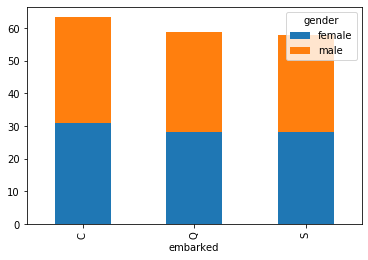

In [27]:
import matplotlib.pyplot as plt
g = df.groupby(by = ['embarked', 'gender'])

r = g.age.mean()
print(r)
print(r.index)
print(r.unstack())

r.unstack().plot(kind = 'bar', stacked = True)
plt.show()


In [28]:
import numpy as np
d = pd.DataFrame(np.linspace(1,10,20).reshape(4,5))
print(d)

          0         1         2         3          4
0  1.000000  1.473684  1.947368  2.421053   2.894737
1  3.368421  3.842105  4.315789  4.789474   5.263158
2  5.736842  6.210526  6.684211  7.157895   7.631579
3  8.105263  8.578947  9.052632  9.526316  10.000000


In [29]:
g = df.groupby(by = ['embarked', 'gender'])

print(dir(g.groups))


for k in g.groups:
    print(k)
    print(g.get_group(k).head())

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']
('S', 'female')
   Unnamed: 0  pclass  survived  \
0           0       1         1   
2           2       1         0   
4           4       1         0   
6           6       1         1   
8           8       1         1   

                                              name  gender   age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0      0   
2                     Allison, Miss. Helen Loraine  female   2.0      1   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  fem

KeyError: (nan, 'female')